# Global Sensitivity Analysis

This notebook offers a further understanding of how the uncertainties can influence the model outputs by performing Global Sensitivity Analysis. The method that was chosen was SOBOL as it offers great accuracy and is easy to generate from the ema workbench (SALib). 

In [1]:
#Remember to delete it in the end
import warnings
warnings.filterwarnings('ignore')

-------------------
## 0. Imports and Setup

In [2]:
#import numpy as np
#import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import networkx as nx

#from datetime import datetime
from ema_workbench import load_results

from SALib.analyze import sobol
from ema_workbench import Samplers
from ema_workbench.em_framework.salib_samplers import get_SALib_problem

In [3]:
from ema_workbench import (
    Model,
    Policy,
    ema_logging,
    SequentialEvaluator,
    MultiprocessingEvaluator,
)
from dike_model_function import DikeNetwork 
from problem_formulation import get_model_for_problem_formulation, sum_over, sum_over_time

In [4]:
ema_logging.log_to_stderr(ema_logging.INFO)

# choose problem formulation
dike_model, planning_steps = get_model_for_problem_formulation('All Dikes')

-------------------
## 1. Perform SALib Analysis

Next step is to perform Global Sensitivity by applying the SALib Analysis, which would return a dictionary with keys for the different relevant indicators (sobol indices of interest: first-order, total effects).

In [5]:
#Set the number of scenarios
n_scenarios = 64

policies= [Policy("Base Case", **dict({L.name: 0 for L in dike_model.levers}))]

with MultiprocessingEvaluator(dike_model) as evaluator:
    results = evaluator.perform_experiments(n_scenarios, policies=policies, uncertainty_sampling=Samplers.SOBOL)


[MainProcess/INFO] pool started with 8 workers
[MainProcess/INFO] performing 2560 scenarios * 1 policies * 1 model(s) = 2560 experiments
100%|██████████████████████████████████████| 2560/2560 [03:56<00:00, 10.80it/s]
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


In [7]:
experiments, outcomes = results
problem = get_SALib_problem(dike_model.uncertainties)
#print(problem)

-------------------
## 2. Visual Analysis

To visualize the first-order and total effects, along with their corresponding confidence intervals that were generated by the SALib Analysis, multiple plots were created for the following outcomes of interest:

1. Total Expected Number of Deaths
2. Total Expected Annual Damage
3. Expected Number of Deaths in Dike Ring 4
4. Expected Annual Damage in Dike Ring 4

By creating these plots, we can gain a better understanding of the relationships and influences of the uncertainties on the desired outcomes.

### 2.1 Total Expected Number of Deaths

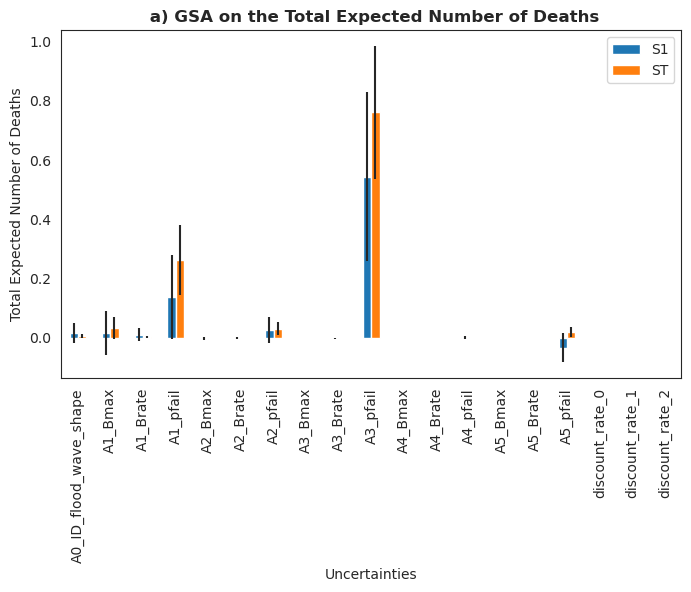

In [8]:
Si = sobol.analyze(problem, outcomes["Total_Expected_Number_of_Deaths"], calc_second_order=True, print_to_console=False)
scores_filtered = {k: Si[k] for k in ["ST", "ST_conf", "S1", "S1_conf"]}
Si_df = pd.DataFrame(scores_filtered, index=problem["names"])

sns.set_style("white")
fig, ax = plt.subplots(1)

indices = Si_df[["S1", "ST"]]
err = Si_df[["S1_conf", "ST_conf"]]

indices.plot.bar(yerr=err.values.T, ax=ax)
fig.set_size_inches(8, 6)
fig.subplots_adjust(bottom=0.3)

#Graph setup
plt.title(' a) GSA on the Total Expected Number of Deaths',fontweight='bold')
plt.xlabel('Uncertainties')
plt.ylabel('Total Expected Number of Deaths')
plt.savefig('./img/GSA_Total_Deaths.png')
plt.show()

### 2.2 Total Expected Annual Damage

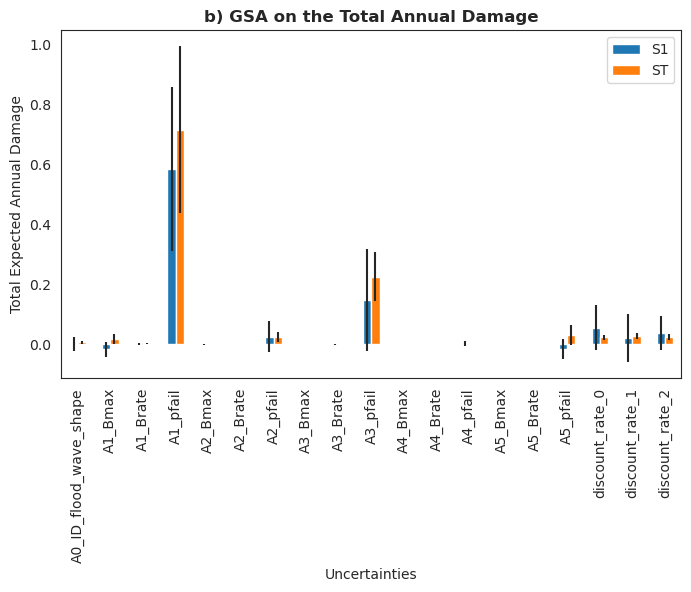

In [9]:
Si = sobol.analyze(problem, outcomes["Total_Expected_Annual_Damage"], calc_second_order=True, print_to_console=False)
scores_filtered = {k: Si[k] for k in ["ST", "ST_conf", "S1", "S1_conf"]}
Si_df = pd.DataFrame(scores_filtered, index=problem["names"])

sns.set_style("white")
fig, ax = plt.subplots(1)

indices = Si_df[["S1", "ST"]]
err = Si_df[["S1_conf", "ST_conf"]]

indices.plot.bar(yerr=err.values.T, ax=ax)
fig.set_size_inches(8, 6)
fig.subplots_adjust(bottom=0.3)

#Graph setup
plt.title('b) GSA on the Total Annual Damage',fontweight='bold')
plt.xlabel('Uncertainties')
plt.ylabel('Total Expected Annual Damage')
plt.savefig('./img/GSA_Total_Damages.png')
plt.show()

### 2.3 Total Expected Number of Deaths in Dike Ring 4

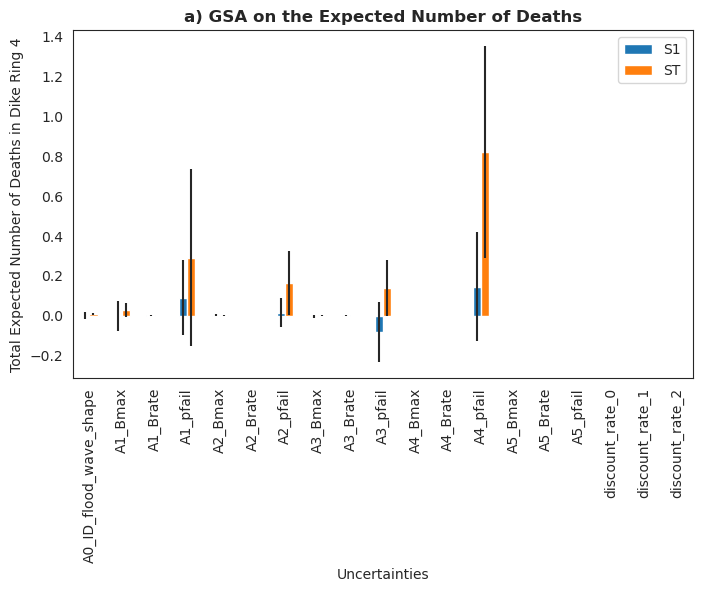

In [10]:
Si = sobol.analyze(problem, outcomes["A4_Expected_Number_of_Deaths"], calc_second_order=True, print_to_console=False)
scores_filtered = {k: Si[k] for k in ["ST", "ST_conf", "S1", "S1_conf"]}
Si_df = pd.DataFrame(scores_filtered, index=problem["names"])

sns.set_style("white")
fig, ax = plt.subplots(1)

indices = Si_df[["S1", "ST"]]
err = Si_df[["S1_conf", "ST_conf"]]

indices.plot.bar(yerr=err.values.T, ax=ax)
fig.set_size_inches(8, 6)
fig.subplots_adjust(bottom=0.3)

#Graph setup
plt.title('a) GSA on the Expected Number of Deaths',fontweight='bold')
plt.xlabel('Uncertainties')
plt.ylabel('Total Expected Number of Deaths in Dike Ring 4')
plt.savefig('./img/GSA_Deaths_DR4.png')
plt.show()

### 2.4 Total Expected Annual Damage in Dike Ring 4

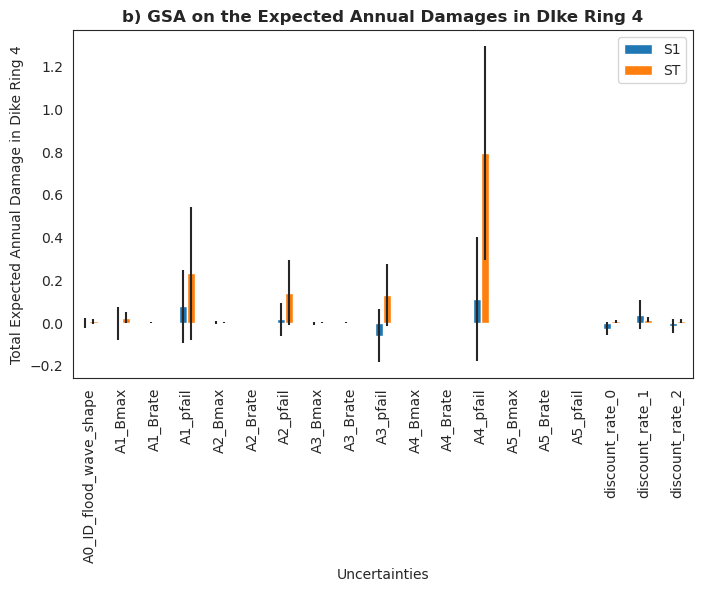

In [11]:
Si = sobol.analyze(problem, outcomes["A4_Expected_Annual_Damage"], calc_second_order=True, print_to_console=False)
scores_filtered = {k: Si[k] for k in ["ST", "ST_conf", "S1", "S1_conf"]}
Si_df = pd.DataFrame(scores_filtered, index=problem["names"])

sns.set_style("white")
fig, ax = plt.subplots(1)

indices = Si_df[["S1", "ST"]]
err = Si_df[["S1_conf", "ST_conf"]]

indices.plot.bar(yerr=err.values.T, ax=ax)
fig.set_size_inches(8, 6)
fig.subplots_adjust(bottom=0.3)

#Graph setup
plt.title('b) GSA on the Expected Annual Damages in DIke Ring 4',fontweight='bold')
plt.xlabel('Uncertainties')
plt.ylabel('Total Expected Annual Damage in Dike Ring 4')
plt.savefig('./img/GSA_Damages_DR4.png')
plt.show()